In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv(r'C:\Users\tusha\OneDrive\Desktop\gold price predictor\models\gld_price_data.csv')

In [3]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']
Z = gold_data.drop(['Date'],axis=1)

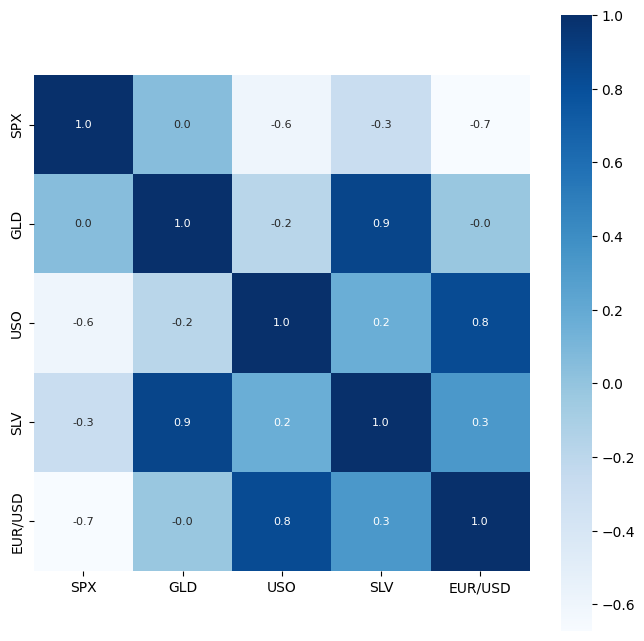

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [10]:
# Calculating the correlation matrix including 'GLD'
correlation_matrix = Z.corr()

# Constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

# Correlation values of GLD
print(correlation_matrix['GLD'])

C:\Users\tusha\AppData\Local\Temp\ipykernel_37476\563101706.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

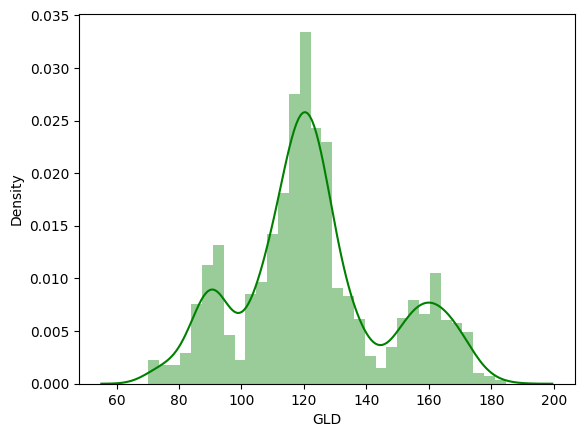

In [11]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [12]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [14]:
regressor = RandomForestRegressor(n_estimators=100)

In [15]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [16]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [17]:
print(test_data_prediction)

[168.50269956  81.9611     115.65770009 127.60350085 120.7534015
 154.80289671 150.01909802 126.18970035 117.46859868 125.85110105
 116.64890106 172.2311006  142.40239914 167.75539865 115.23410021
 117.50020065 138.15410279 170.03300058 159.38160306 158.32629905
 155.09180014 125.47020012 176.30419978 157.13490298 125.24570057
  93.6909994   77.22900018 120.38300053 119.20699955 167.55700056
  88.40190058 125.27460017  91.19050087 117.72140026 121.14299893
 136.47580101 115.42030137 115.17240086 145.72019988 107.29930071
 104.59900249  87.26319825 126.51940055 117.85079973 153.90269881
 119.61029992 108.32379967 107.92759821  93.20230054 127.02039827
  75.09150022 113.65379936 121.50280008 111.31889904 118.98339928
 120.64349925 160.04050058 168.03420164 147.17299727  85.92119851
  94.35920066  86.81129921  90.46250024 118.98830074 126.50030082
 127.42279995 169.46100033 122.41599924 117.42989872  98.45160034
 168.45430143 143.27749914 132.13680316 121.19880234 120.9008996
 119.7265007

In [18]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9893230134709086


In [19]:
Y_test = list(Y_test)

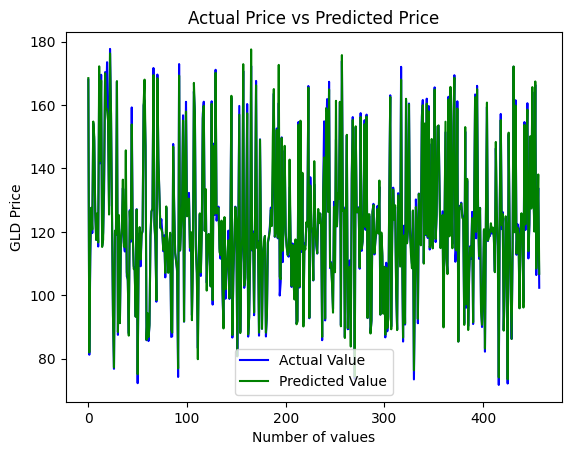

In [20]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [21]:
import pickle
filename = 'model.pkl'
pickle.dump(regressor, open(filename, 'wb'))
